# Import packages and data 

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import scipy.stats
import anndata
import matplotlib.pyplot as plt
import matplotlib as mpl
import rpy2

In [2]:
sc.settings.verbosity = 1  # verbosity: errors (0), warnings (1), info (2), hints (3)
# Set up the plot config for viewing the annotation clearly.
sc.settings.set_figure_params(dpi=120, dpi_save=1000)
sc.logging.print_versions()

scanpy==1.4.4 anndata==0.7.1 umap==0.3.10 numpy==1.17.1 scipy==1.4.1 pandas==0.23.0 scikit-learn==0.22.2.post1 statsmodels==0.11.1 python-igraph==0.8.0 louvain==0.6.1


In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Load the DS cells

In [4]:
adata = sc.read('/Users/b8058304/Documents/PhD_work/Coding/fbm_ds_cite_seq/data/fbm_ds_citeseq_plus_scrna_forMS_20210119.h5ad')

In [5]:
adata.raw = adata

In [6]:
cell_numbers = adata.obs.groupby(["cell.labels"]).apply(len)
cell_numbers

cell.labels
CAR                          4
CD8 T cell                 181
CD14 monocyte              320
CD56 bright NK              79
CMP                         50
DC1                         45
DC2                        228
DC3                        108
HSC                        105
ILC precursor               13
MEMP                       130
MK                          83
MOP                        422
MSC                         53
Treg                         8
chondrocyte                  4
early B cell                42
early MK                    34
early erythroid           1348
endothelium                111
eo/baso/mast precursor      53
eosinophil                  63
late erythroid            6336
macrophage                 113
mast cell                   39
mast cell                   27
mature B cell               31
mature NK                  147
mid erythroid             5230
myelocyte                  243
neutrophil                 273
osteoblast                 

In [7]:
celltypes = ['HSC', 'MEMP', 'early erythroid']

In [8]:
adata = adata[adata.obs['cell.labels'].isin(celltypes)].copy()

In [9]:
cell_numbers = adata.obs.groupby(["cell.labels"]).apply(len)
cell_numbers

cell.labels
HSC                 105
MEMP                130
early erythroid    1348
dtype: int64

In [10]:
adata.obs["tissue"] = "ds"
adata.obs["tissue_cell.labels"] = adata.obs["tissue"].astype(str) + '_' + adata.obs["cell.labels"].astype(str)

In [11]:
cell_numbers = adata.obs.groupby(["tissue_cell.labels"]).apply(len)
cell_numbers

tissue_cell.labels
ds_HSC                 105
ds_MEMP                130
ds_early erythroid    1348
dtype: int64

In [12]:
ds = adata

# Load the non-DS cells

In [13]:
adata = sc.read('/Users/b8058304/Documents/PhD_work/Coding/bm_plus_19pcw/data/bm_plus_19pcw_raw_dr_20201007.h5ad')

In [14]:
adata.raw = adata

In [15]:
cell_numbers = adata.obs.groupby(["cell.labels"]).apply(len)
cell_numbers

cell.labels
CD4 T cell                   327
CD8 T cell                   171
CD14 monocyte               8763
CD56 bright NK               449
CMP                          425
DC1                           50
DC2                          598
DC3                          705
DC precursor                 201
ELP                         1357
GMP                         1281
HSC                           92
ILC precursor                 67
LMPP                          34
MEMP                          16
MEP                          269
MK                          1000
MOP                         3838
MPP myeloid                   92
NK T cell                    111
NK progenitor                 26
Treg                          62
adipo-CAR                    353
arteriolar fibroblast         83
basophil                     139
chondrocyte                   80
early MK                    1624
early erythroid             7474
early osteoblast             280
endosteal fibroblast          5

In [16]:
celltypes = ['HSC', 'MEMP', 'MEP', 'early erythroid']

In [17]:
adata = adata[adata.obs['cell.labels'].isin(celltypes)].copy()

In [18]:
cell_numbers = adata.obs.groupby(["cell.labels"]).apply(len)
cell_numbers

cell.labels
HSC                  92
MEMP                 16
MEP                 269
early erythroid    7474
dtype: int64

In [19]:
adata.obs['cell.labels'] = adata.obs['cell.labels'].replace(["MEP", "MEMP"], ["MEP_MEMP", "MEP_MEMP"])

In [20]:
cell_numbers = adata.obs.groupby(["cell.labels"]).apply(len)
cell_numbers

cell.labels
HSC                  92
MEP_MEMP            285
early erythroid    7474
dtype: int64

In [21]:
adata.shape

(7851, 33712)

In [22]:
adata.obs["tissue"] = "non_ds"
adata.obs["tissue_cell.labels"] = adata.obs["tissue"].astype(str) + '_' + adata.obs["cell.labels"].astype(str)

In [23]:
cell_numbers = adata.obs.groupby(["tissue_cell.labels"]).apply(len)
cell_numbers

tissue_cell.labels
non_ds_HSC                  92
non_ds_MEP_MEMP            285
non_ds_early erythroid    7474
dtype: int64

In [24]:
non_ds = adata

# Combine the DS and non-DS eryth cells

In [25]:
merged = ds.concatenate(non_ds, index_unique=None, join='outer')

In [26]:
merged.shape

(9434, 33712)

In [27]:
cell_numbers = merged.obs.groupby(["tissue_cell.labels"]).apply(len)
cell_numbers

tissue_cell.labels
ds_HSC                     105
ds_MEMP                    130
ds_early erythroid        1348
non_ds_HSC                  92
non_ds_MEP_MEMP            285
non_ds_early erythroid    7474
dtype: int64

In [28]:
adata = merged

In [29]:
adata.shape

(9434, 33712)

In [30]:
adata.X

<9434x33712 sparse matrix of type '<class 'numpy.float32'>'
	with 37839909 stored elements in Compressed Sparse Row format>

In [31]:
adata.X = np.nan_to_num(adata.X, copy=False)

In [32]:
adata.X

<9434x33712 sparse matrix of type '<class 'numpy.float32'>'
	with 37839909 stored elements in Compressed Sparse Row format>

# Pre-process the dataset

In [33]:
# normalise count data 
sc.pp.normalize_total(adata)

In [34]:
# log the count data 
sc.pp.log1p(adata)

In [35]:
# find variable genes
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5) 

In [36]:
# scale the data 
sc.pp.scale(adata, max_value=10)

In [37]:
# scale the negative values in adata.X (which have been normalised, logged and scaled) to zero 
adata.X = np.where(adata.X < 0, 0, adata.X)

# Get monocle3 metadata (for both DS and non-DS) and save into obj

In [38]:
# load DS eryth metadata
ds_metadata = pd.read_csv("/Users/b8058304/Documents/PhD_work/Coding/manuscript_figs_mk2/data/downs_eryth_monocle3_pst_metadata_20210125.csv")
ds_metadata.index=ds_metadata["Unnamed: 0"]

# load non-DS metadata
non_ds_metadata = pd.read_csv("/Users/b8058304/Documents/PhD_work/Coding/manuscript_figs_mk3/data/fbm_eryth_monocle3_pst_metadata_20210429.csv")
non_ds_metadata.index=non_ds_metadata["Unnamed: 0"]

In [39]:
# add metadata into obj
adata.obs["ds_monocle3_pst_val"] = ds_metadata["cell_color"]
adata.obs["ds_monocle3_pst_val"] = adata.obs["ds_monocle3_pst_val"].replace(np.inf, np.nan)

adata.obs["non_ds_monocle3_pst_val"] = non_ds_metadata["cell_color"]
adata.obs["non_ds_monocle3_pst_val"] = adata.obs["non_ds_monocle3_pst_val"].replace(np.inf, np.nan)

# Save obj

In [40]:
adata.write("/Users/b8058304/Documents/PhD_work/Coding/manuscript_figs_mk3/data/figs8e_combined_ds_non_ds_eryth_dr_20210429.h5ad")

... storing '__is_in_cluster__' as categorical
... storing 'age' as categorical
... storing 'april_cell.labels' as categorical
... storing 'auto_prd' as categorical
... storing 'cell.labels' as categorical
... storing 'cell.labels_20200708' as categorical
... storing 'cell.labels_20200713' as categorical
... storing 'cell.labels_20200718' as categorical
... storing 'doublets' as categorical
... storing 'fetal.ids' as categorical
... storing 'gender' as categorical
... storing 'is_doublet' as categorical
... storing 'is_doublet_poptrim' as categorical
... storing 'is_doublet_wolock' as categorical
... storing 'lanes' as categorical
... storing 'leiden' as categorical
... storing 'lr_pred' as categorical
... storing 'mad_prd' as categorical
... storing 'mito.threshold' as categorical
... storing 'nk_meta' as categorical
... storing 'orig.ident' as categorical
... storing 'processing.type' as categorical
... storing 'sequencing.type' as categorical
... storing 'sex' as categorical
... sto

# Run plots for genes over pseudotime

In [41]:
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import scipy.stats
import anndata
import matplotlib.pyplot as plt
import matplotlib as mpl
import rpy2

In [42]:
sc.settings.verbosity = 1  # verbosity: errors (0), warnings (1), info (2), hints (3)
# Set up the plot config for viewing the annotation clearly.
sc.settings.set_figure_params(dpi=120, dpi_save=1000)
sc.logging.print_versions()

scanpy==1.4.4 anndata==0.7.1 umap==0.3.10 numpy==1.17.1 scipy==1.4.1 pandas==0.23.0 scikit-learn==0.22.2.post1 statsmodels==0.11.1 python-igraph==0.8.0 louvain==0.6.1


In [43]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [44]:
adata = sc.read("/Users/b8058304/Documents/PhD_work/Coding/manuscript_figs_mk3/data/figs8e_combined_ds_non_ds_eryth_dr_20210429.h5ad")

In [45]:
cell_numbers = adata.obs.groupby(["tissue_cell.labels"]).apply(len)
cell_numbers

tissue_cell.labels
ds_HSC                     105
ds_MEMP                    130
ds_early erythroid        1348
non_ds_HSC                  92
non_ds_MEP_MEMP            285
non_ds_early erythroid    7474
dtype: int64

# Plot eryth-poiesis genes over heatmap

In [46]:
eryth_genes=['CD74', 
'ANGPT2',
'MPL',             
'CCND3',             
'PKLR',
'RHD',  
'EPCAM',             
'CA2',
'CDC20',
'EPB42',            
'ALAD',
'CA1',
'SLC2A1',
'MKI67',                         
'SLC4A1']

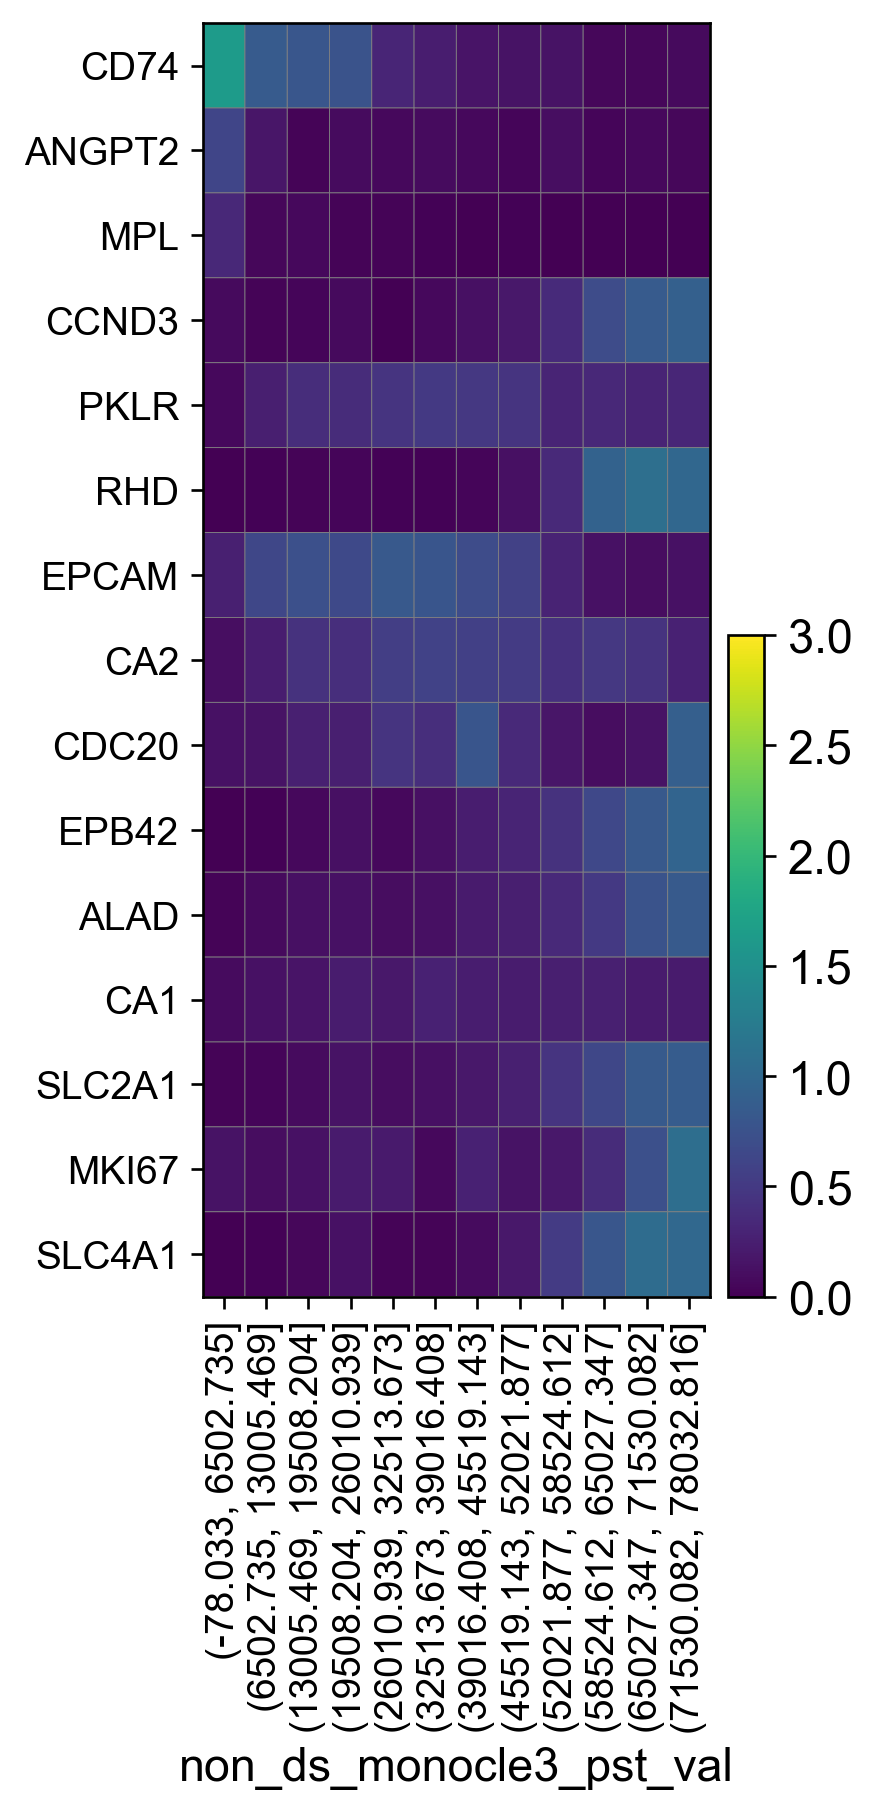

In [47]:
non_ds_eryth_celltypes = ['non_ds_HSC', 'non_ds_MEMP', 'non_ds_early erythroid']

non_ds_eryth_subset = adata[adata.obs['tissue_cell.labels'].isin(non_ds_eryth_celltypes)].copy()

gs = sc.pl.matrixplot(non_ds_eryth_subset, var_names=eryth_genes,
                      save="non_ds_eryth_pst_eryth_genes_20210429.pdf", 
                      num_categories=12, 
                      groupby='non_ds_monocle3_pst_val', swap_axes=True, use_raw=False, figsize=[3,7], vmax=3)

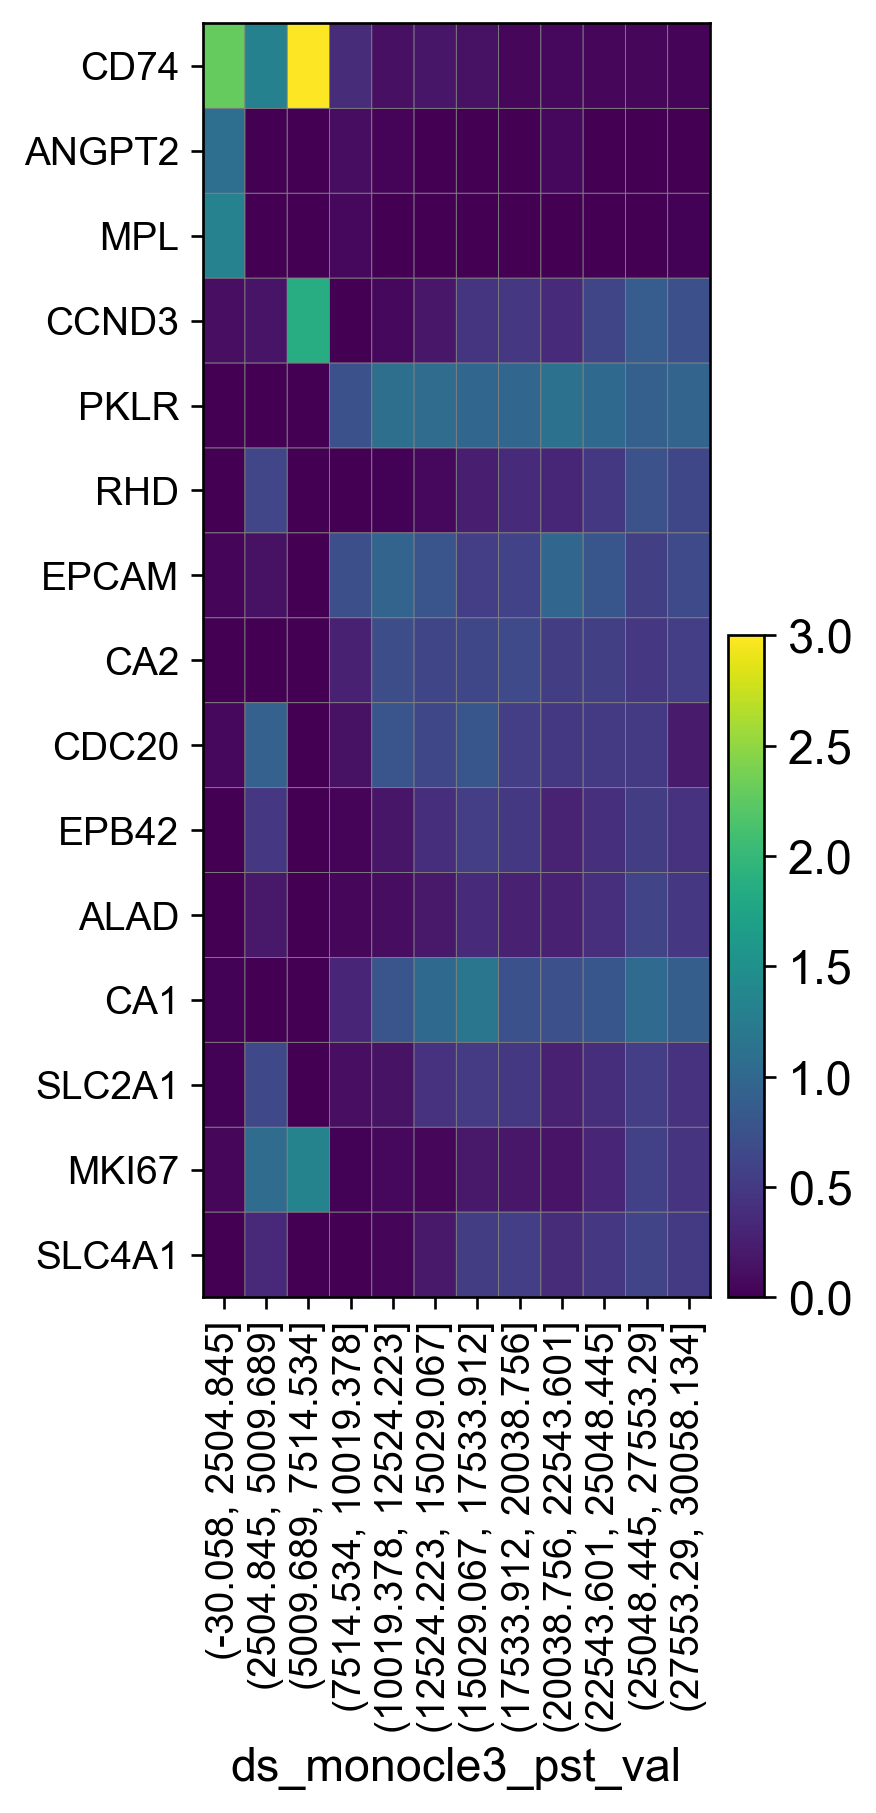

In [48]:
ds_eryth_celltypes = ['ds_HSC', 'ds_MEMP', 'ds_early erythroid']

ds_eryth_subset = adata[adata.obs['tissue_cell.labels'].isin(ds_eryth_celltypes)].copy()

gs = sc.pl.matrixplot(ds_eryth_subset, var_names=eryth_genes, 
                      save="ds_eryth_pst_eryth_genes_20210429.pdf", 
                      num_categories=12, 
                      groupby='ds_monocle3_pst_val', swap_axes=True, use_raw=False, figsize=[3, 7], vmax=3)

# Plot density plots

non_ds_HSC
#d200d2
non_ds_MEMP
#00a500
non_ds_early erythroid
#cbcbff


/Users/b8058304/.pyenv/versions/3.6.4/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log
  


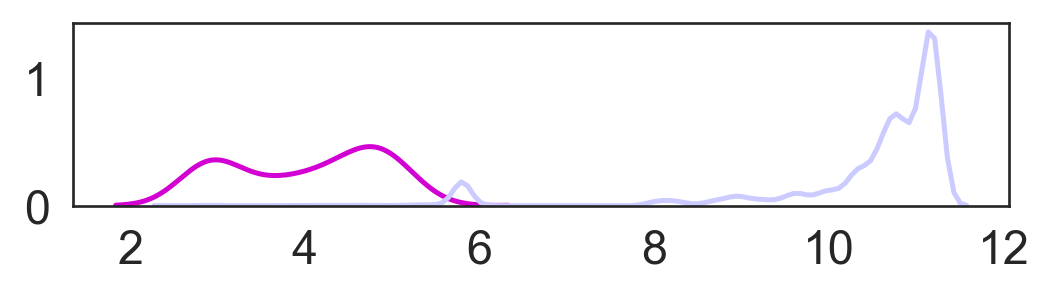

In [49]:
df = pd.DataFrame(non_ds_eryth_subset.obs)
mpl.rcParams['figure.figsize'] = 5, 1

celltype_list=['non_ds_HSC', 'non_ds_MEMP', 'non_ds_early erythroid']
colour_list = ['#d200d2', '#00a500', '#cbcbff']
j=-1
sns.set_style("white")

for i in celltype_list:
    print(i)
    j=j+1
    print(colour_list[j])
    subset_df=df[df["tissue_cell.labels"]==i]
    ax=sns.kdeplot(np.log(subset_df["non_ds_monocle3_pst_val"]), color=colour_list[j], legend=False)

plt.show()
fig = ax.get_figure()
fig.savefig('/Users/b8058304/Documents/PhD_work/Coding/manuscript_figs_mk3/useful_scripts/fig5_downs/figures/non_ds_eryth_pst_celltypes_20210429.pdf')

ds_HSC
#d200d2
ds_MEP_MEMP
#00a500
ds_early erythroid
#cbcbff


/Users/b8058304/.pyenv/versions/3.6.4/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log
  


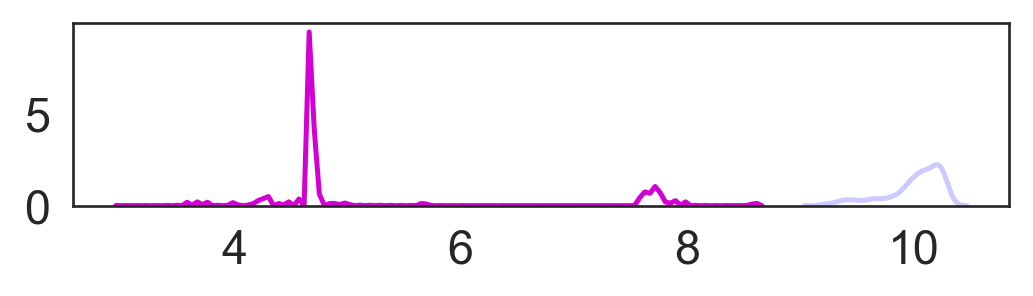

In [50]:
df = pd.DataFrame(ds_eryth_subset.obs)
mpl.rcParams['figure.figsize'] = 5, 1

celltype_list=['ds_HSC', 'ds_MEP_MEMP', 'ds_early erythroid']
colour_list = ['#d200d2', '#00a500', '#cbcbff']
j=-1
sns.set_style("white")

for i in celltype_list:
    print(i)
    j=j+1
    print(colour_list[j])
    subset_df=df[df["tissue_cell.labels"]==i]
    ax=sns.kdeplot(np.log(subset_df["ds_monocle3_pst_val"]), color=colour_list[j], legend=False)

plt.show()
fig = ax.get_figure()
fig.savefig('/Users/b8058304/Documents/PhD_work/Coding/manuscript_figs_mk3/useful_scripts/fig5_downs/figures/ds_eryth_pst_celltypes_20210429.pdf')